In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install imbalanced-learn


In [4]:
import pandas as pd


file_path = '/content/drive/MyDrive/credit_card_fraud_detection/creditcard.csv'
df = pd.read_csv(file_path)


df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

#dtypes
print("\nData Types:\n", df.dtypes)

#shape
print("\nDataset Shape:", df.shape)
#statistics
df.describe()


Missing Values:
 Series([], dtype: int64)

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


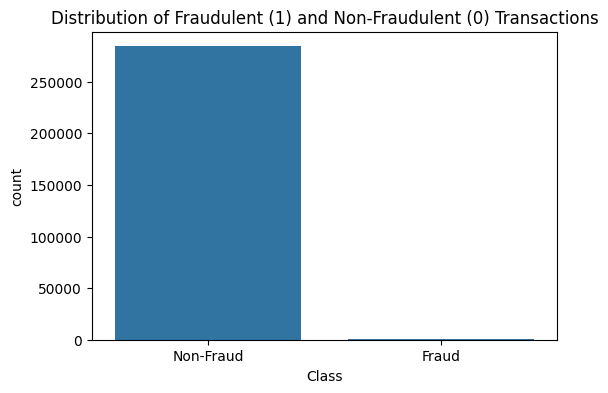

In [6]:
#distribution
class_counts = df['Class'].value_counts()
print("Class Distribution:\n", class_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent (1) and Non-Fraudulent (0) Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()



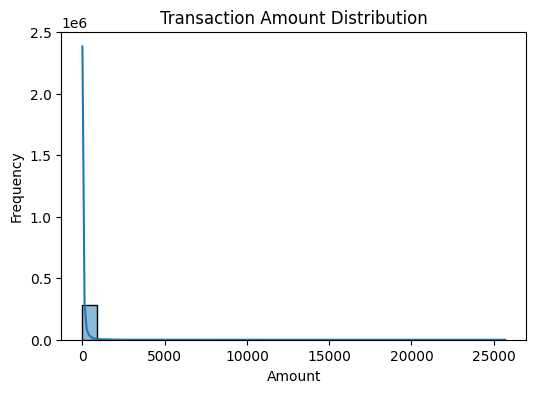

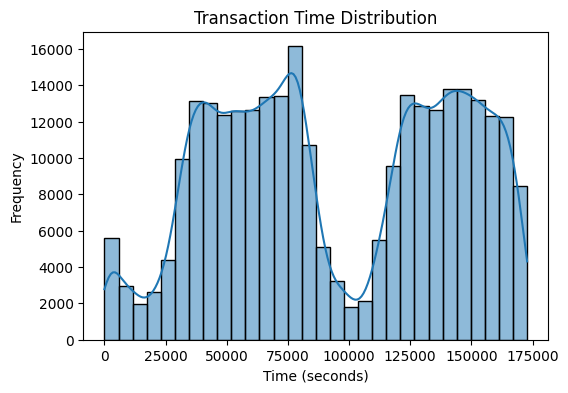

In [7]:
#amount distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

#time distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=30, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


In [8]:
from imblearn.over_sampling import SMOTE

#Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

#SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#new class distribution
print("Original Class Distribution:\n", y.value_counts())
print("Resampled Class Distribution:\n", y_resampled.value_counts())


Original Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Resampled Class Distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

#standardScaler
scaler = StandardScaler()

#Fit and transform the resampled data
X_rescaled = scaler.fit_transform(X_resampled)


In [10]:
from sklearn.model_selection import train_test_split

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (454904, 30)
Testing set size: (113726, 30)


In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

#actual fraud rate in the training set
actual_fraud_rate = y_train.sum() / len(y_train)
print(f"Actual Fraud Rate in Training Set: {actual_fraud_rate:.4f}")

#Retrain with the adjusted contamination parameter
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=actual_fraud_rate, random_state=42)
iso_forest.fit(X_train)

#new predictions
y_pred_test = iso_forest.predict(X_test)
y_pred_test = [1 if i == -1 else 0 for i in y_pred_test]

#Re-evaluate the model
print("Updated Classification Report on Test Data")
print(classification_report(y_test, y_pred_test, target_names=['Non-Fraud (0)', 'Fraud (1)']))

#Confusion Matrix
print("\nUpdated Confusion Matrix")
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

#Updated Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nUpdated Accuracy: {accuracy * 100:.2f}%")



Actual Fraud Rate in Training Set: 0.4998
Updated Classification Report on Test Data
               precision    recall  f1-score   support

Non-Fraud (0)       0.74      0.74      0.74     56750
    Fraud (1)       0.74      0.74      0.74     56976

     accuracy                           0.74    113726
    macro avg       0.74      0.74      0.74    113726
 weighted avg       0.74      0.74      0.74    113726


Updated Confusion Matrix
[[42039 14711]
 [14657 42319]]

Updated Accuracy: 74.18%


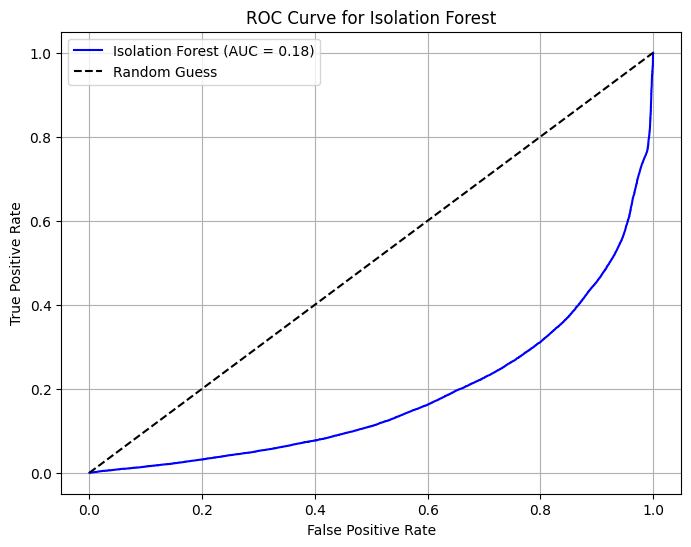

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score
# Calculate ROC Curve and AUC
y_scores_final = iso_forest.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores_final)
auc_score = roc_auc_score(y_test, y_scores_final)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Isolation Forest (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Isolation Forest')
plt.legend()
plt.grid()
plt.show()

In [13]:
import joblib
joblib.dump(iso_forest, 'isolation_forest_model.pkl')


['isolation_forest_model.pkl']